# 参考

样式调整：
https://blog.csdn.net/wuzlun/article/details/80059222

matplotlib 中文网： https://www.matplotlib.org.cn/gallery/text_labels_and_annotations/annotation_demo.html

# 前言

当你在网上搜索答案的时候，你会遇到各种实现的方法，如果你只是单纯的把找到的答案copypaste，那总有一天你会和我一样崩溃。感觉自己就是个没有谷哥就不会画图的傻子。。。

所以，如果你：

学习matplotlib的时候是从标题类似于"五分钟教你matplotlib画图” 这种教程开始的
起码知道这一句 'import matplotlib.pyplot as plt'
遇到稍微复杂的细节就要一顿查，遇到修改xy坐标，名称，等等就头大
打开matplotlib的官方指南，不止一次，但是一脸懵逼
在这几个词 figure, axes, axis 在matplotlib出现时就一脸完了的表情
那么你不是一个人。我一直和你在一起。

所以这份指南是用来（尝试）解决这个问题的。我们花短短的时间，来从根本上了解一下matplotlib的架构，各种名词是什么意思，一个正常的画图程序是什么。

# `plt.***` 和 `ax.***`的区别
我认为所有不先讲清楚`plt.***`和`ax.***` 两种画图方式的区别的教程都是耍流氓。一上来就告诉你，`plt.figure()`, `plt.plot()`, `plt.show()`，这么画就对了的，都是不负责任的表现！

## 在matplotlib中，有两种画图方式：
**`plt.figure()`**： `plt.***`系列。通过`plt.xxx` 来画图，其实是取了一个捷径。这是通过matplotlib提供的一个api，这个plt提供了很多基本的function可以让你很快的画出图来，但是如果你想要更细致的精调，就要使用另外一种方法。

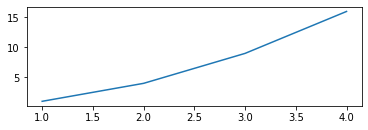

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
A = np.arange(1,5)
B = A**2
C = A**3


plt.figure(1)  
plt.subplot(211)   
plt.plot(A,B)   
plt.show()

`fig, ax = plt.subplots()`: 这个就是正统的稍微复杂一点的画图方法了。指定figure和axes，然后对axes单独操作。等下就讲figure和axes都神马意思。

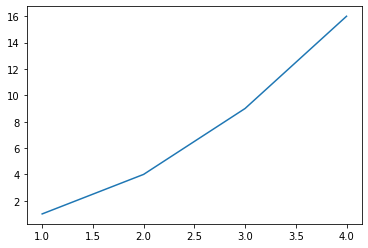

In [3]:
fig, ax = plt.subplots()   
ax.plot(A,B)

大部分的新手教程，都是以`plt.xxx`开始的。我个人认为这不是一个很好的方式。的确, `plt.xxx`简单易懂上手快，但是plt把matplotlib的结构看成一个blackbox，新手在不知道这个lib到底是如何运作的情况下以为自己上手了，可是当你需要细调你的图的时候，你就发现你完全不明白网上的人为什么要用`ax.xxx`， 为什么还有其他那么多种方式来加题目。这样的学习过程是非常不利于长期发展的。
因此，从我这个傻子的经验，我强烈建议在初学matplotlib的时候，尽量避免使用`plt.xxx`系列。当你明白`figure/axes/axis`都是控制什么的时候，如果你想要简单的制作一个quick and dirty的图，用`plt.xxx`才是OK。

# 名词解释 in matplotlib
matplotlib的名词定于对于非英语母语的人来说实在是太不友好了。尤其是axes。仰天长啸。

从官方借了个图:

![matplotlib-1](https://pptwinpics.oss-cn-beijing.aliyuncs.com/matplotlib-1_20191129203615.png)

+ `Figure fig = plt.figure()`: 可以解释为画布。
    + 画图的第一件事，就是创建一个画布figure，然后在这个画布上加各种元素。

+ `Axes ax = fig.add_subplot(1,1,1)`: 不想定义，没法定义，就叫他axes！
    + 首先，这个不是你画图的xy坐标抽！
    + 希望当初写这个lib的时候他们用一个更好的名字。。。
    + 可以把axes理解为你要放到画布上的各个物体。比如你要画一个太阳，一个房子，一个车在画布上，那么太阳是一个axes，房子是一个axes，etc。
    + 如果你的figure只有一张图，那么你只有一个axes。如果你的figure有subplot，那么每一个subplot就是一个axes
    + axes是matlibplot的宇宙中心！axes下可以修改编辑的变量非常多，基本上能包含你的所有需求。
+ `Axis ax.xaxis/ax.yaxis`: 对，这才是你的xy坐标轴。
    + 每个坐标轴实际上也是由竖线和数字组成的，每一个竖线其实也是一个axis的subplot，因此ax.xaxis也存在axes这个对象。对这个axes进行编辑就会修改xaxis图像上的表现。
    
# 图像的各个部位名称
再从使用指南 [User Guide](https://link.zhihu.com/?target=https%3A//matplotlib.org/tutorials/introductory/usage.html) 借个图。每个部分的名称指南，这样当你想修改一个部位的时候，起码知道关键字啊。

![matplotlib-2](https://pptwinpics.oss-cn-beijing.aliyuncs.com/matplotlib-2_20191129203903.png)

## 一步一步来，用传统方法画个图
下面就是实战。用调取ax的方式来画个图。不要用plt！！

# 首先，搞个画布
我喜欢用这个命令来开始画图。哪怕你没有subplot，也可以用这个subplots来创建一个画布。

这个function创建了一个大小为（14，7）的画布，把这个画布赋值给变量fig，同时在这个画布上创建了一个axes，把这个axes赋值给ax。这样，所有未来的`fig.xxx`都是对这个画布的操作，所有`ax.xxx`都是对这个axes的操作。

如果你有两个图，那么ax是一个有两个元素`ax[0]`,`ax[1]` 的list。`ax[0]`就对应第一个subplot的ax。

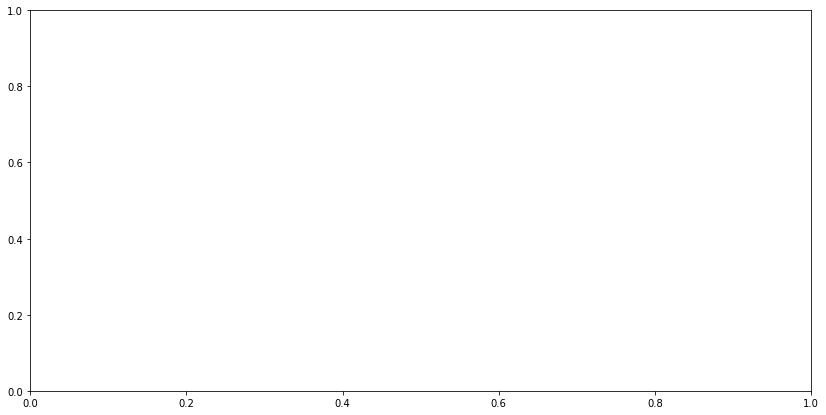

In [4]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

# 好了画布搞好了，画数据。
注意，我们这里依然不使用plt！因为我们要在这个axes上画数据，因此就用ax.plot()来画。画完第一个再call一次，再画第二个。

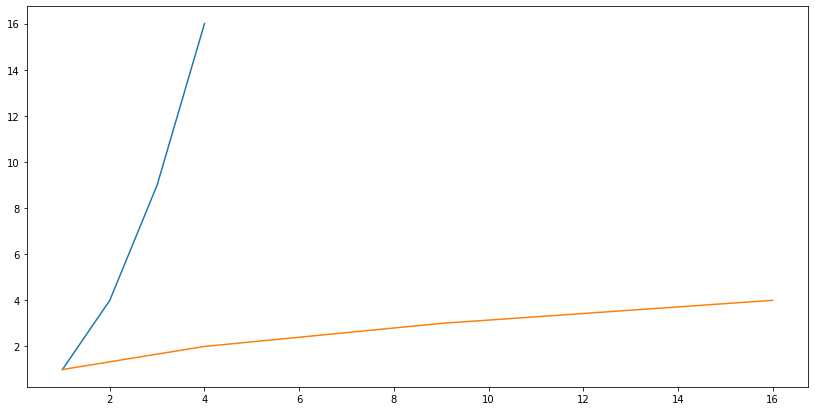

In [5]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

ax.plot(A,B,label='1')
ax.plot(B,A,label='2')


# 下面开始细节的处理
数据画好了就可以各种细调坐标轴啊，tick啊之类的。

首先把标题和xy坐标轴的标题搞定。Again, 不用plt。直接在axes上进行设定。

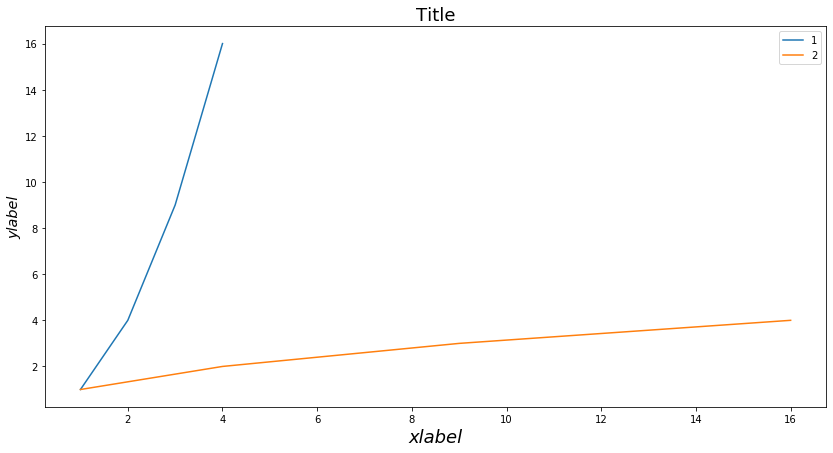

In [9]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

ax.plot(A,B,label='1')
ax.plot(B,A,label='2')

ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend()

然后是xy坐标轴的一些属性设定, 也是在axes level上完成的

No handles with labels found to put in legend.


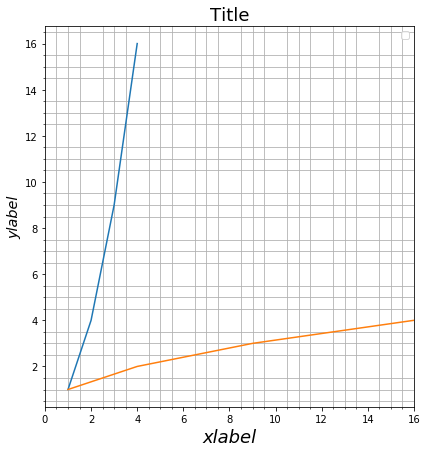

In [7]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

ax.plot(A,B)
ax.plot(B,A)

ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend()

ax.set_aspect('equal') 
ax.minorticks_on() 
ax.set_xlim(0,16) 
ax.grid(which='minor', axis='both')

最后是坐标轴tick和细节，这个在axes.xaxis or axes.yaxis上完成。

No handles with labels found to put in legend.


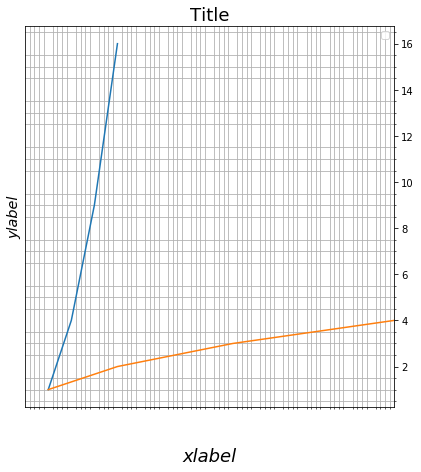

In [8]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

ax.plot(A,B)
ax.plot(B,A)

ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend()

ax.set_aspect('equal') 
ax.minorticks_on() 
ax.set_xlim(0,16) 
ax.grid(which='minor', axis='both')

ax.xaxis.set_tick_params(rotation=45,labelsize=18,colors='w') 
start, end = ax.get_xlim() 
ax.xaxis.set_ticks(np.arange(start, end,1)) 
ax.yaxis.tick_right()

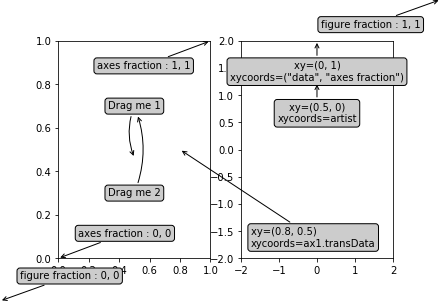

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom

fig, (ax1, ax2) = plt.subplots(1, 2)

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

# Here we'll demonstrate the extents of the coordinate system and how
# we place annotating text.

ax1.annotate('figure fraction : 0, 0', xy=(0, 0), xycoords='figure fraction',
             xytext=(20, 20), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('figure fraction : 1, 1', xy=(1, 1), xycoords='figure fraction',
             xytext=(-20, -20), textcoords='offset points',
             ha="right", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('axes fraction : 0, 0', xy=(0, 0), xycoords='axes fraction',
             xytext=(20, 20), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('axes fraction : 1, 1', xy=(1, 1), xycoords='axes fraction',
             xytext=(-20, -20), textcoords='offset points',
             ha="right", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

# It is also possible to generate draggable annotations

an1 = ax1.annotate('Drag me 1', xy=(.5, .7), xycoords='data',
                   #xytext=(.5, .7), textcoords='data',
                   ha="center", va="center",
                   bbox=bbox_args,
                   #arrowprops=arrow_args
                   )

an2 = ax1.annotate('Drag me 2', xy=(.5, .5), xycoords=an1,
                   xytext=(.5, .3), textcoords='axes fraction',
                   ha="center", va="center",
                   bbox=bbox_args,
                   arrowprops=dict(patchB=an1.get_bbox_patch(),
                                   connectionstyle="arc3,rad=0.2",
                                   **arrow_args))
an1.draggable()
an2.draggable()

an3 = ax1.annotate('', xy=(.5, .5), xycoords=an2,
                   xytext=(.5, .5), textcoords=an1,
                   ha="center", va="center",
                   bbox=bbox_args,
                   arrowprops=dict(patchA=an1.get_bbox_patch(),
                                   patchB=an2.get_bbox_patch(),
                                   connectionstyle="arc3,rad=0.2",
                                   **arrow_args))

# Finally we'll show off some more complex annotation and placement

text = ax2.annotate('xy=(0, 1)\nxycoords=("data", "axes fraction")',
                    xy=(0, 1), xycoords=("data", 'axes fraction'),
                    xytext=(0, -20), textcoords='offset points',
                    ha="center", va="top",
                    bbox=bbox_args,
                    arrowprops=arrow_args)

ax2.annotate('xy=(0.5, 0)\nxycoords=artist',
             xy=(0.5, 0.), xycoords=text,
             xytext=(0, -20), textcoords='offset points',
             ha="center", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax2.annotate('xy=(0.8, 0.5)\nxycoords=ax1.transData',
             xy=(0.8, 0.5), xycoords=ax1.transData,
             xytext=(10, 10),
             textcoords=OffsetFrom(ax2.bbox, (0, 0), "points"),
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax2.set(xlim=[-2, 2], ylim=[-2, 2])
plt.show()

[(-20, 20), (-20, 20)]

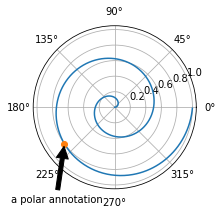

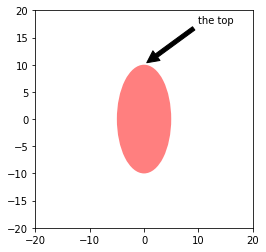

In [14]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(3, 3))
r = np.arange(0, 1, 0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

# You can also use polar notation on a cartesian axes.  Here the native
# coordinate system ('data') is cartesian, so you need to specify the
# xycoords and textcoords as 'polar' if you want to use (theta, radius).

el = Ellipse((0, 0), 10, 20, facecolor='r', alpha=0.5)

fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'))
ax.add_artist(el)
el.set_clip_box(ax.bbox)
ax.annotate('the top',
            xy=(np.pi/2., 10.),      # theta, radius
            xytext=(np.pi/3, 20.),   # theta, radius
            xycoords='polar',
            textcoords='polar',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box

ax.set(xlim=[-20, 20], ylim=[-20, 20])

[(-5, 3), (-1, 5)]

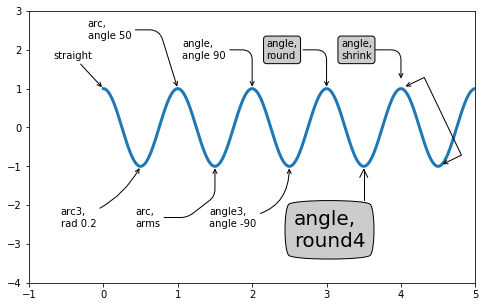

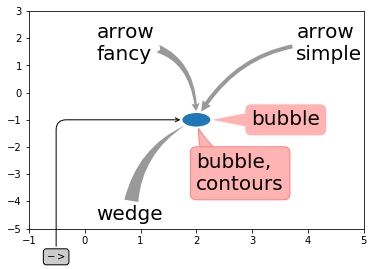

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=3)

ax.annotate('straight',
            xy=(0, 1), xycoords='data',
            xytext=(-50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('arc3,\nrad 0.2',
            xy=(0.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2"))

ax.annotate('arc,\nangle 50',
            xy=(1., 1), xycoords='data',
            xytext=(-90, 50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=50,rad=10"))

ax.annotate('arc,\narms',
            xy=(1.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=40,angleB=-90,armB=30,rad=7"))

ax.annotate('angle,\nangle 90',
            xy=(2., 1), xycoords='data',
            xytext=(-70, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate('angle3,\nangle -90',
            xy=(2.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('angle,\nround',
            xy=(3., 1), xycoords='data',
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate('angle,\nround4',
            xy=(3.5, -1), xycoords='data',
            xytext=(-70, -80), textcoords='offset points',
            size=20,
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=-90,rad=10"))

ax.annotate('angle,\nshrink',
            xy=(4., 1), xycoords='data',
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=10,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# You can pass an empty string to get only annotation arrows rendered
ann = ax.annotate('', xy=(4., 1.), xycoords='data',
                  xytext=(4.5, -1), textcoords='data',
                  arrowprops=dict(arrowstyle="<->",
                                  connectionstyle="bar",
                                  ec="k",
                                  shrinkA=5, shrinkB=5))

ax.set(xlim=(-1, 5), ylim=(-4, 3))

# We'll create another figure so that it doesn't get too cluttered
fig, ax = plt.subplots()

el = Ellipse((2, -1), 0.5, 0.5)
ax.add_patch(el)

ax.annotate('$->$',
            xy=(2., -1), xycoords='data',
            xytext=(-150, -140), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            patchB=el,
                            connectionstyle="angle,angleA=90,angleB=0,rad=10"))

ax.annotate('arrow\nfancy',
            xy=(2., -1), xycoords='data',
            xytext=(-100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('arrow\nsimple',
            xy=(2., -1), xycoords='data',
            xytext=(100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=0.3"))

ax.annotate('wedge',
            xy=(2., -1), xycoords='data',
            xytext=(-100, -100), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.7",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=-0.3"))

ann = ax.annotate('bubble,\ncontours',
                  xy=(2., -1), xycoords='data',
                  xytext=(0, -70), textcoords='offset points',
                  size=20,
                  bbox=dict(boxstyle="round",
                            fc=(1.0, 0.7, 0.7),
                            ec=(1., .5, .5)),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.8),
                                  connectionstyle="arc3,rad=-0.1"))

ann = ax.annotate('bubble',
                  xy=(2., -1), xycoords='data',
                  xytext=(55, 0), textcoords='offset points',
                  size=20, va="center",
                  bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec="none",
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.5)))

ax.set(xlim=(-1, 5), ylim=(-5, 3))